In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9zZ4PxOtKRt40CcEyA9474lwaycCyHaLHE5kXKkl_WX8',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'bigdataanalytics-donotdelete-pr-jbznn3opp2ljtc'
object_key = 'iris.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

import io
import pandas as pd
import ibm_boto3
from ibm_botocore.client import Config, ClientError

In [2]:
df_data_1.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
#importing libraries 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn.svm import SVC   #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.metrics import confusion_matrix

In [49]:
X=df_data_1.iloc[:,0:4]
Y=df_data_1["species"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (105, 4)
Test Shape (45, 4)


# LOGISTIC REGRESSION 

The accuracy of the Logistic Regression is 97.77777777777777


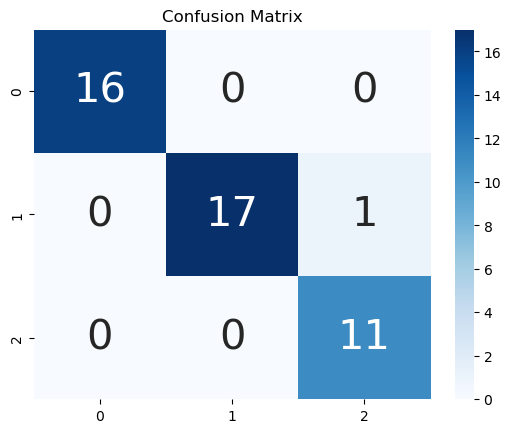

In [50]:
log = LogisticRegression()
log.fit(X_train,Y_train)
prediction=log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(Y_test,prediction)*100)
cm = confusion_matrix(Y_test, prediction )
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# DECISION TREE

The accuracy of the Decision Tree is 97.77777777777777


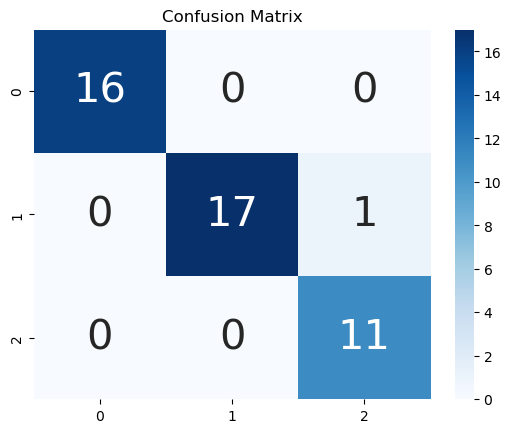

In [61]:
tree=DecisionTreeClassifier(random_state=0,max_depth=3)
tree.fit(X_train,Y_train)
prediction=tree.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,Y_test)*100)
cm2 = confusion_matrix(Y_test, prediction )
ax = plt.axes()
sns.heatmap(cm2, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# KNN

The accuracy of the KNN is 97.77777777777777


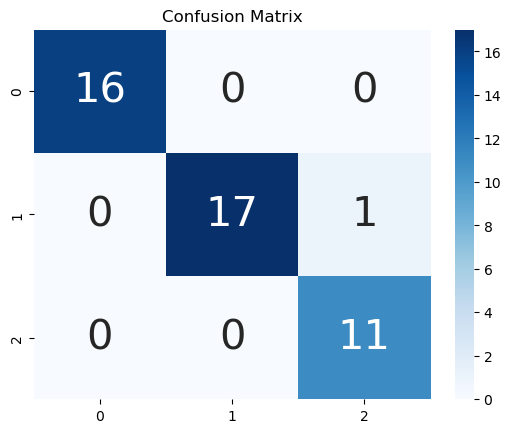

In [52]:
knn=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
knn.fit(X_train,Y_train)
prediction=knn.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,Y_test)*100)
ax = plt.axes()
cm = confusion_matrix(Y_test, prediction )
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# Support Vector Machine

The accuracy of the SVC is 97.77777777777777


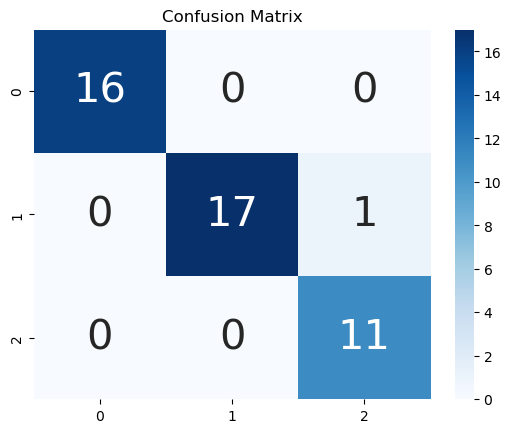

In [62]:
svc=SVC()
svc.fit(X_train,Y_train) 
prediction=svc.predict(X_test)
print('The accuracy of the SVC is',metrics.accuracy_score(prediction,Y_test)*100)
ax = plt.axes()
cm = confusion_matrix(Y_test, prediction )
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# RANDOM FOREST 

The accuracy of the SVC is 97.77777777777777


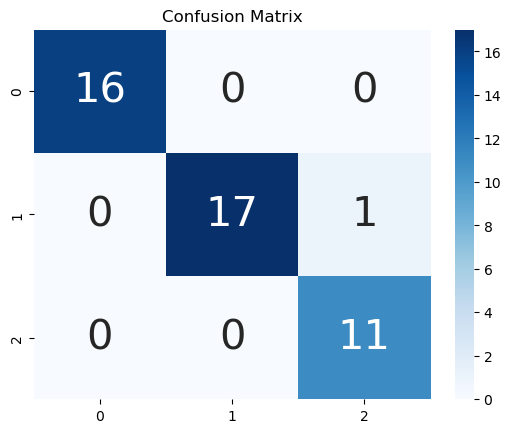

In [59]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
forest.fit(X_train,Y_train)
print('The accuracy of the SVC is',metrics.accuracy_score(prediction,Y_test)*100)
ax = plt.axes()
cm = confusion_matrix(Y_test, prediction )
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()